<a href="https://colab.research.google.com/github/Mukesh-kanna/Bitcoin-Analysis/blob/main/Bitcoin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [8]:
data = pd.read_csv('BTC-USD.csv')

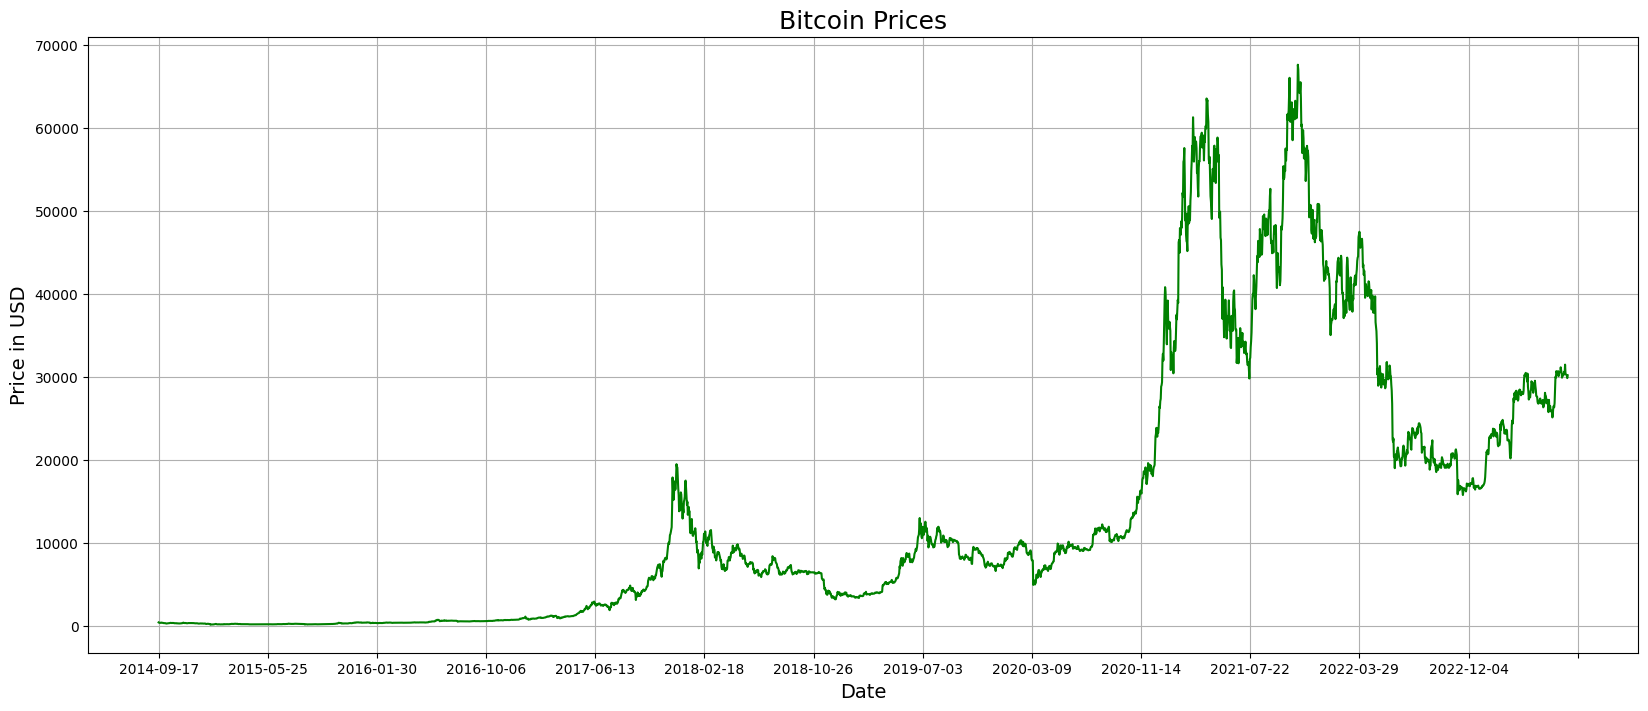

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Bitcoin Prices', fontsize=18)
plt.grid()
plt.show()

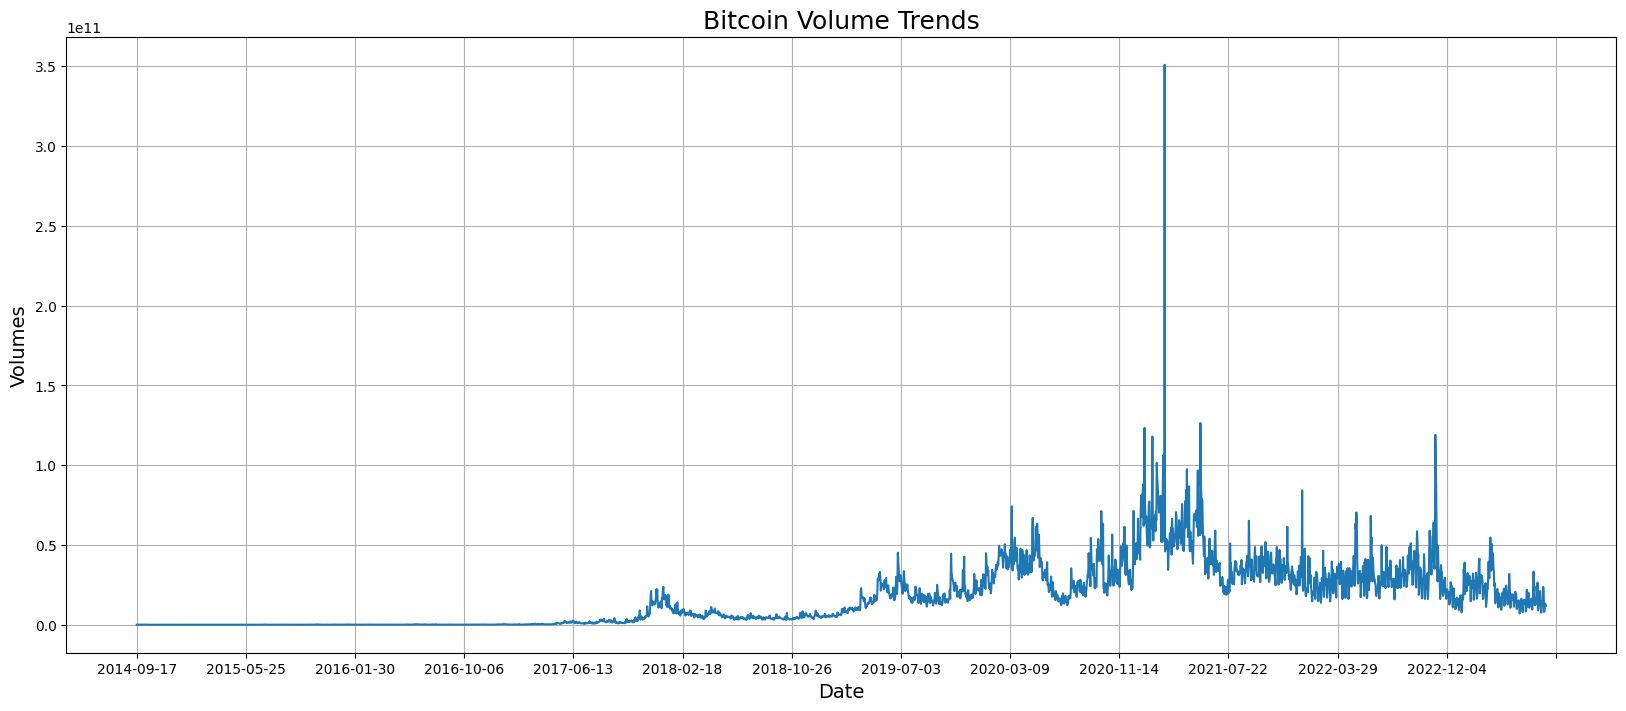

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volumes', fontsize=14)
plt.title('Bitcoin Volume Trends', fontsize=18)
plt.grid()
plt.show()

In [57]:
data['Market Cap'] = data['Open'] * data['Volume']
print(data['Market Cap'])

0       9.809605e+09
1       1.575399e+10
2       1.608186e+10
3       1.454907e+10
4       1.084694e+10
            ...     
3223    2.430082e+14
3224    2.580304e+14
3225    4.005098e+14
3226    3.960993e+14
3227    3.562356e+14
Name: Market Cap, Length: 3228, dtype: float64


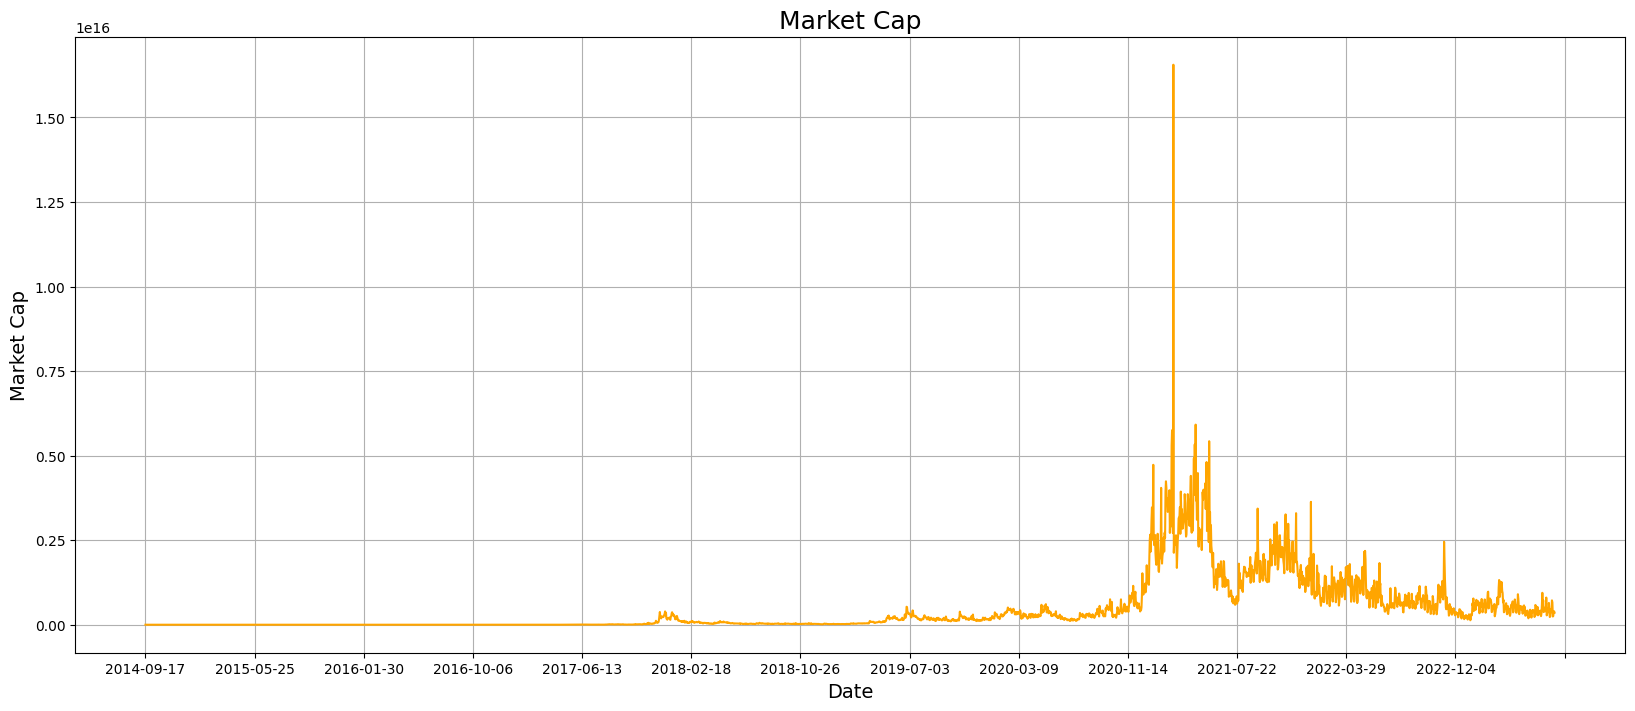

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Market Cap'], color='Orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Market Cap', fontsize=14)
plt.title('Market Cap', fontsize=18)
plt.grid()
plt.show()

In [60]:
data['vol'] = (data['Close'] / data['Close'].shift(1)) - 1
print(data['vol'])

0            NaN
1      -0.071926
2      -0.069843
3       0.035735
4      -0.024659
          ...   
3223   -0.001261
3224   -0.001541
3225   -0.003413
3226   -0.009598
3227    0.011165
Name: vol, Length: 3228, dtype: float64


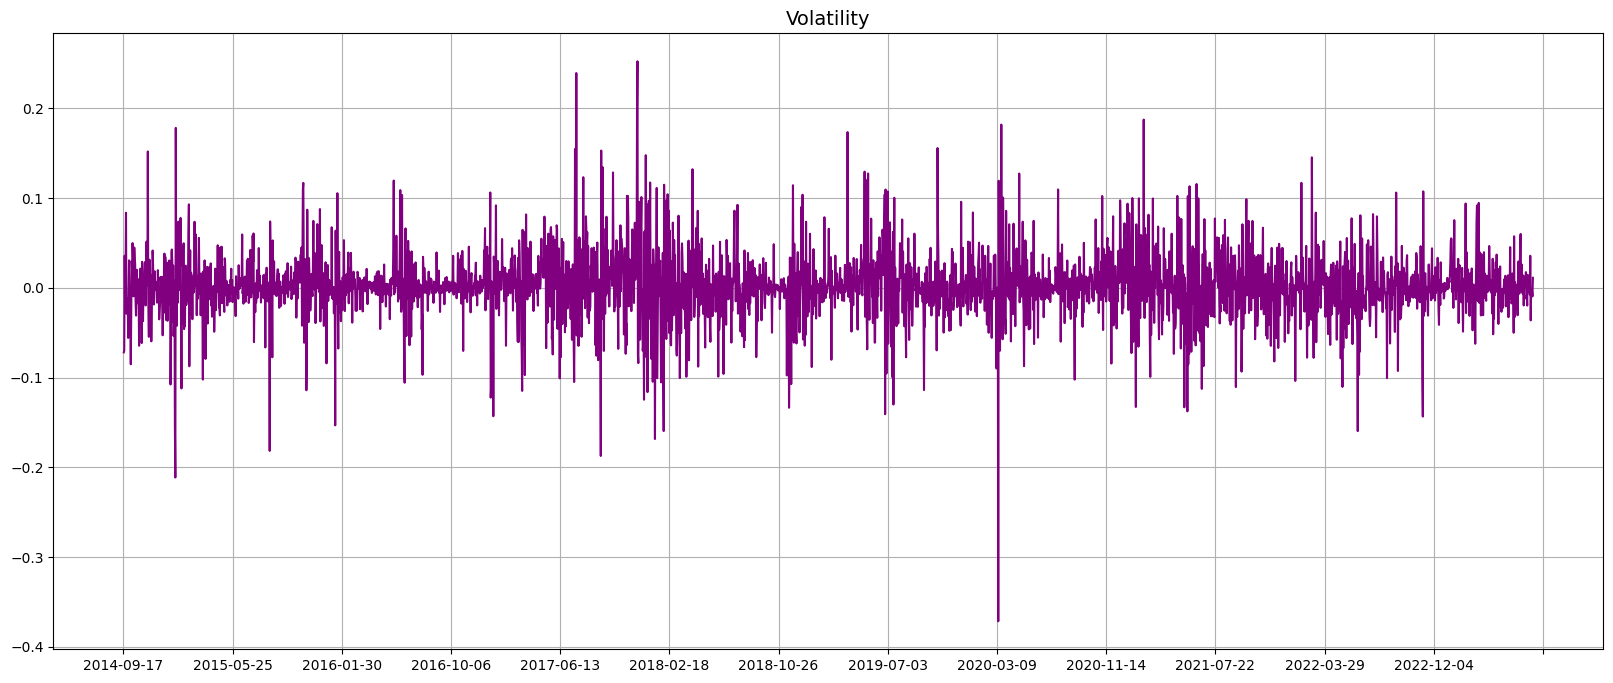

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=14)
plt.grid()
plt.show()

In [54]:
data['Cumulative Return'] = (1 + data['vol']).cumprod()
print(data['Cumulative Return'])

0             NaN
1        0.928074
2        0.863255
3        0.894104
4        0.872056
          ...    
3223    66.244376
3224    66.142320
3225    65.916568
3226    65.283931
3227    66.012808
Name: Cumulative Return, Length: 3228, dtype: float64


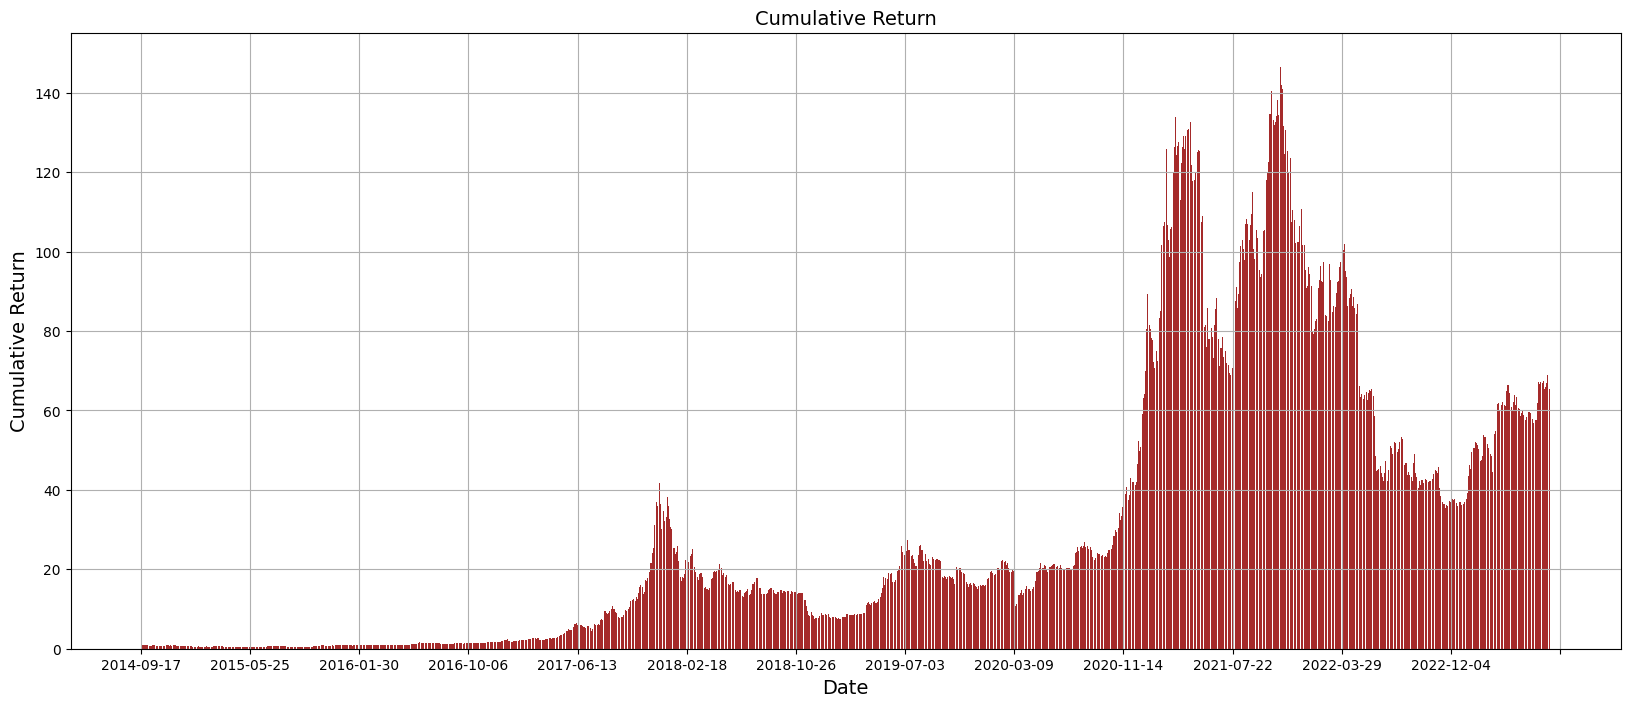

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Cumulative Return'], color='Brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return', fontsize=14)
plt.title('Cumulative Return', fontsize=14)
plt.grid()
plt.show()

In [29]:
data['MA for 10 days'] = data['Open'].rolling(10).mean()
data['MA for 20 days'] = data['Open'].rolling(20).mean()
data['MA for 50 days'] = data['Open'].rolling(50).mean()
data['MA for 100 days'] = data['Open'].rolling(100).mean()

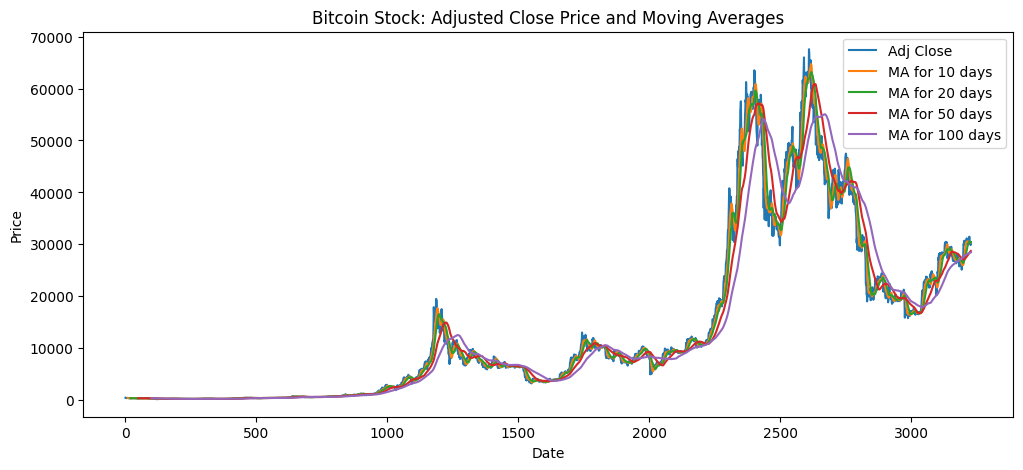

In [31]:
truncated_data = data.truncate()
truncated_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12, 5))

plt.title('Bitcoin Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
data = data.sort_values(by='Date')
data['Daily_Price_Change'] = data['Close'].diff()
print(data)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
3223  2023-07-15  30331.783203  30407.781250  30263.462891  30295.806641   
3224  2023-07-16  30297.472656  30437.560547  30089.669922  30249.132813   
3225  2023-07-17  30249.626953  30336.400391  29685.783203  30145.888672   
3226  2023-07-18  30147.070313  30233.656250  29556.427734  29856.562500   
3227  2023-07-20  29919.064453  30224.115234  29918.281250  30189.902344   

         Adj Close       Volume    Market Cap       vol  Cumulative Return  \
0       4

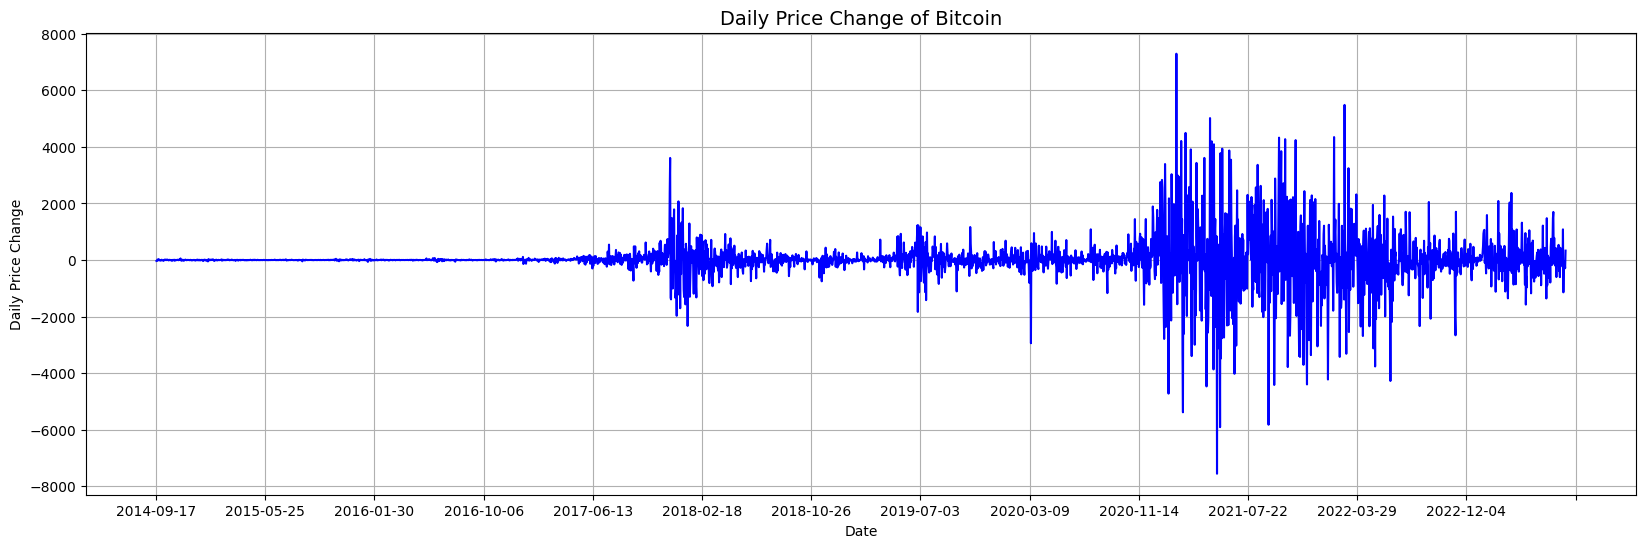

In [44]:
fig1, ax = plt.subplots(figsize=(20, 6))
ax.plot(data['Date'], data['Daily_Price_Change'], color='b', label='Daily Price Change')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xlabel('Date')
plt.ylabel('Daily Price Change')
plt.title('Daily Price Change of Bitcoin', fontsize=14)
plt.grid()
plt.show()

In [55]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Bitcoin Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

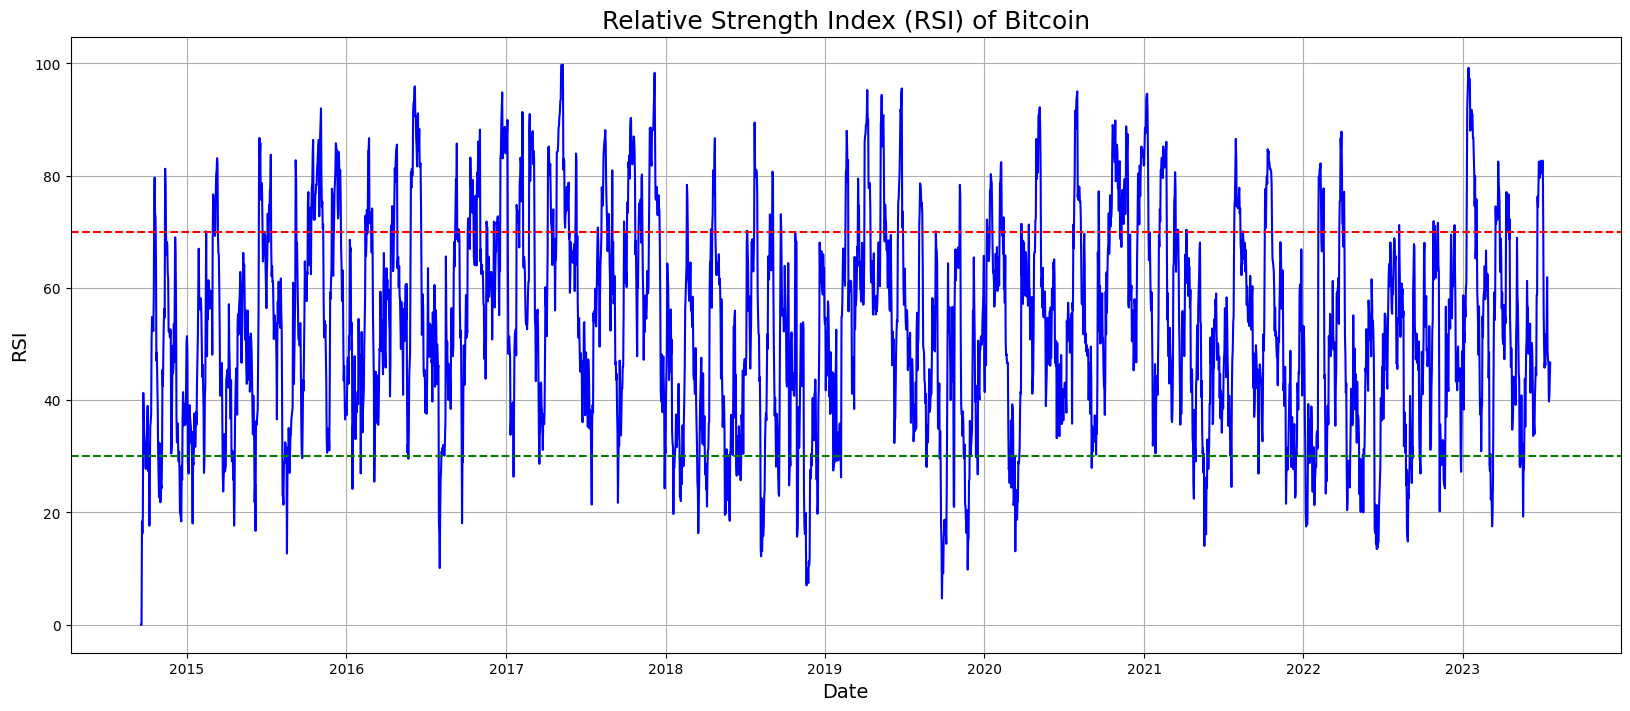

In [52]:

data['Date'] = pd.to_datetime(data['Date'])


data = data.sort_values(by='Date')

data['Daily_Price_Change'] = data['Close'].diff()


def calculate_rsi(data, window=14):
    delta = data['Daily_Price_Change']
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    relative_strength = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + relative_strength))

    return rsi

data['RSI'] = calculate_rsi(data)

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['RSI'], color='b', label='RSI')
ax.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
ax.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('RSI', fontsize=14)
plt.title('Relative Strength Index (RSI) of Bitcoin', fontsize=18)
plt.grid()
plt.show()